**MACHINE LEARNING LAB - 03/06/2020 | SANDHYA M (1947139) -  3MCS**

**Lab Session 2 - Naive Bayes Classifier**

1.	Demonstrate Naive Bayes Classifier for nominal Data. - Accuracy **(94%)**
2.  Demonstrate Naive Bayes Classifier for numeric Data. - Accuracy **(95%)**
3.  Demonstrate error using any three metrics and two plots.

**Importing Packages**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
sns.set()

**Loading Numerical Data - Breast_cancer.csv**

In [40]:
df = pd.read_csv("D:/MSC/3 sem/ML Lab/Lab 2/data set_breast cancer.csv") 

**Shuffling the data**

In [41]:
df = df.sample(frac=1)
df.iloc[:10]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
121,86517,M,18.660,17.12,121.40,1077.0,0.10540,0.11000,0.14570,0.086650,...,22.250,24.90,145.40,1549.0,0.1503,0.22910,0.32720,0.16740,0.2894,0.08456
81,8611161,B,13.340,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.069870,...,15.530,23.19,96.66,614.9,0.1536,0.47910,0.48580,0.17080,0.3527,0.10160
213,881094802,M,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.065970,...,18.070,28.07,120.40,1021.0,0.1243,0.17930,0.28030,0.10990,0.1603,0.06818
536,91979701,M,14.270,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.061390,...,15.290,34.27,104.30,728.3,0.1380,0.27330,0.42340,0.13620,0.2698,0.08351
322,894855,B,12.860,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.034000,...,14.040,21.08,92.80,599.5,0.1547,0.22310,0.17910,0.11550,0.2382,0.08553
446,9110732,M,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.082930,...,21.530,38.54,145.40,1437.0,0.1401,0.37620,0.63990,0.19700,0.2972,0.09075
159,871149,B,10.900,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,...,12.360,18.20,78.07,470.0,0.1171,0.08294,0.01854,0.03953,0.2738,0.07685
344,89864002,B,11.710,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.032500,...,13.060,18.16,84.16,516.4,0.1460,0.11150,0.10870,0.07864,0.2765,0.07806
51,857373,B,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,...,14.670,23.19,96.08,656.7,0.1089,0.15820,0.10500,0.08586,0.2346,0.08025
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.1297,0.13570,0.06880,0.02564,0.3105,0.07409


**Drop Id Column**

In [42]:
df = df.drop(columns=['id'])

**Displaying 5 number summary of the attributes**

In [43]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Count Class Labels**

In [44]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Finding correlation**

diagnosis
B    357
M    212
dtype: int64


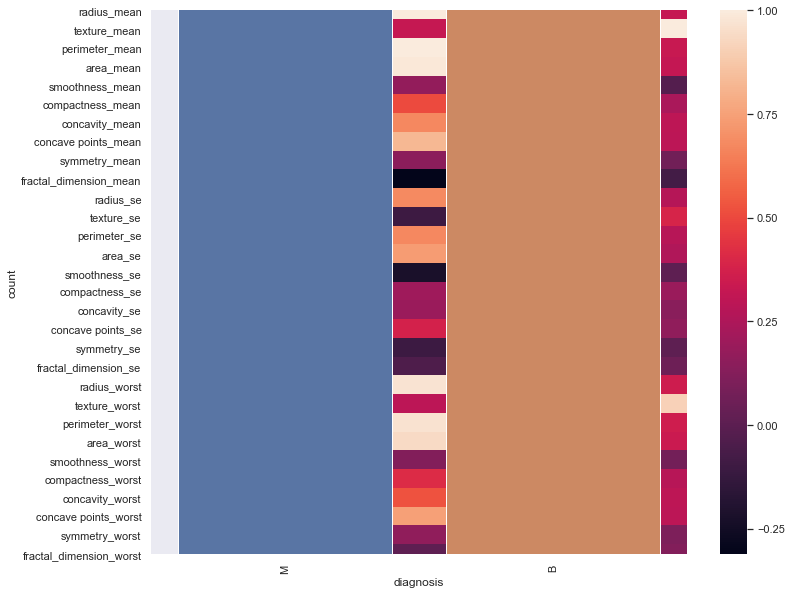

In [45]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), ax=ax)

print(df.groupby('diagnosis').size())
sns.countplot(df['diagnosis'],label="Count")
plt.show()

**Quartile range**

In [46]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
inter_quartile_range = Q3 - Q1

**Quartiles and Interquartile range**

In [47]:
df_out = df[~((df < (Q1 - (1.5 * inter_quartile_range))) | (df > (Q3 + (1.5 * inter_quartile_range)))).any(axis=1)]
df.shape, df_out.shape

((569, 31), (398, 31))

**Separate labels and features**

In [48]:
X = df_out.drop(columns=['diagnosis'])
y = df_out['diagnosis']

**Convert the M to 1 and B to 0**

In [49]:
label = LabelEncoder()
y = label.fit_transform(y)
y[:20]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Spilt the train and test data - 30% test data**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

**Cross validation function**

In [51]:
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]


def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]


def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]


def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]


def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)

**Cross validation purpose**

In [52]:
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}

**acc list and rcc list stores the output of each model**

In [53]:
acc = []
roc = []

**Naive Bayes**

In [54]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Naive Bayes ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

Naive Bayes 
Training Set Accuracy :  0.9424460431654677
Test Set Accuracy 0.95 ROC 0.9360795454545455


**Confusion Matrix Plot - Breast_cancer.csv**

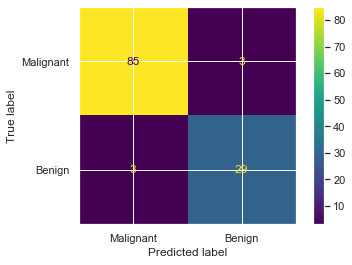

In [55]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test,display_labels=['Malignant','Benign'])

Malignant cancers : Precision = 0.9659090909090909 Recall= 0.9659090909090909
Benign cancers    : Precision = 0.90625 Recall= 0.90625


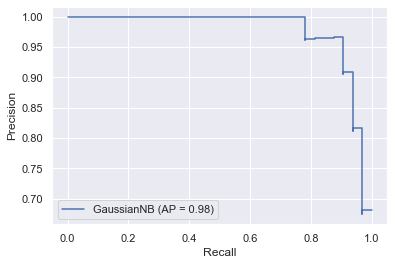

In [56]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

plot_precision_recall_curve(model,X_test,y_test)

v=precision_recall_fscore_support(y_test,y_pred)
print("Malignant cancers : Precision = "+str(v[0][0])+" Recall= "+str(v[1][0]))
print("Benign cancers    : Precision = "+str(v[0][1])+" Recall= "+str(v[1][1]))

**Accuracy Rate of Numerical Data - Breast_cancer.csv**

In [57]:
print("Accuracy for Predicting Benign or Malignant cancer : "+str(accuracy_score(y_test,y_pred)))

Accuracy for Predicting Benign or Malignant cancer : 0.95


In [58]:
print(y_test)
print(y_pred)

[0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0]
[0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0]


**Loading Nominal Data - Cars.csv**

In [61]:
df=pd.read_csv("D:/MSC/3 sem/ML Lab/Lab 2/cars.csv")
df

,buying,maint,doors,persons,lug_boot,safety,acc
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,1
1724,low,low,5more,more,med,high,1
1725,low,low,5more,more,big,low,0
1726,low,low,5more,more,big,med,1


In [62]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acc'], dtype='object')

In [63]:
X=df[df.columns[0:6]]
Y=df[df.columns[6]]

X=pd.get_dummies(X)

In [64]:
from sklearn.naive_bayes import CategoricalNB
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=1)

In [65]:
cat_nb = CategoricalNB()
cat_nb.fit(X_train, y_train)

CategoricalNB()

In [66]:
y_pred=cat_nb.predict(X_test)

**Confusion Matrix Plot - Cars.csv**

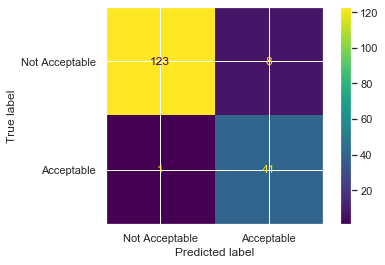

In [67]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cat_nb, X_test, y_test,display_labels=["Not Acceptable",'Acceptable'])

Not Acceptable cars: Precision=0.9919354838709677 recall=0.9389312977099237
Acceptable cars    : Precision=0.8367346938775511 recall=0.9761904761904762


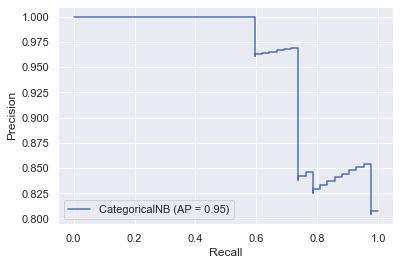

In [69]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

plot_precision_recall_curve(cat_nb,X_test,y_test)

v=precision_recall_fscore_support(y_test,y_pred)
print("Not Acceptable cars: Precision="+str(v[0][0])+" recall="+str(v[1][0]))
print("Acceptable cars    : Precision="+str(v[0][1])+" recall="+str(v[1][1]))

**Accuracy Rate of Nominal Data - Cars.csv**

In [70]:
print("The Accuracy for predicting Not Acceptable or Acceptable car:"+str(accuracy_score(y_test,y_pred)))

The Accuracy for predicting Not Acceptable or Acceptable car:0.9479768786127167
